In [193]:
#Importing Libraries

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [195]:
np.random.seed(2)

In [196]:
#sklearn

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


sns.set(style='white', context='notebook', palette='deep')

# TASK 1: DATA PRE-PROCESSING and EXPLORATION

In [198]:
#loading the data (both training and testing set)

In [199]:
# Loading train and test data
train = pd.read_csv("datasets provided/trndata.csv")
test = pd.read_csv("datasets provided/tstdata.csv")
train.head()

F1      F2      F3      F4      F5      F6      F7      F8      F9  \
0  0.3315  0.2156  0.6802  0.1434  0.6825  0.2720  0.6223  0.2092  0.7961   
1  0.0939  1.0089  0.0365  0.6944  0.0908  0.4961  0.0722  0.6521 -0.0130   
2  0.5184  0.2283  0.5300  0.6884  0.7456  0.6171  0.6136  0.5928  0.7678   
3  0.4208  0.6740  0.1651  0.7592  0.1810  0.5448  0.1707  0.7554  0.1635   
4  0.3130  0.6465  0.5908  0.6924  0.7664  0.6262  1.7177  0.0150  0.0851   

      F10     F11     F12  L  
0  0.1530  0.5856  0.2573  1  
1  0.6085  0.0631  0.6597  2  
2  0.6130  0.6705  0.5202  1  
3  0.5492  0.2598  0.6455  2  
4  1.9046 -0.0165  0.0221  3

In [200]:
test.head()

F1      F2      F3      F4      F5      F6      F7      F8      F9  \
0  0.5803  0.4980  0.8809  0.8215  1.0133  0.9187  0.8508  0.8496  0.9996   
1  0.0026  0.6084  0.2808  0.6282  0.2995  0.7513 -0.0107  1.7503 -0.0622   
2 -0.0115  1.1193  0.2201  1.3189  0.2656  1.4039 -0.0067  1.7438  0.0013   
3 -0.0536  1.0370  0.0558  1.2483  0.2640  1.1456  0.0140  1.7156  0.0125   
4  0.5021  0.4270  0.6450  0.8325  0.7560  0.9235  0.7289  0.7352  0.7735   

      F10     F11     F12  L  
0  0.9670  0.9111  0.7814  1  
1  2.0704 -0.0999  0.1214  3  
2  2.0020 -0.0401  1.7797  3  
3  1.9889 -0.0598  0.0709  3  
4  0.9298  0.6013  0.8842  1

In [201]:
len(train) #length for train set

1000

In [202]:
len(test) #length for test set

300

C:\Users\seaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    343
3    341
2    316
Name: L, dtype: int64

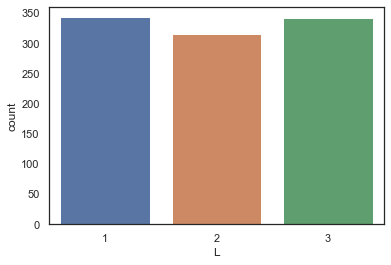

In [203]:


Y_train = train["L"]

# Drop 'label' column
X_train = train.drop(labels = ["L"],axis = 1)  

g = sns.countplot(Y_train)

Y_train.value_counts()



In [204]:
# Check the data
X_train.isnull().any().describe()

count        12
unique        1
top       False
freq         12
dtype: object

In [205]:
test.isnull().any().describe()

count        13
unique        1
top       False
freq         13
dtype: object

C:\Users\seaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    104
2     98
1     98
Name: L, dtype: int64

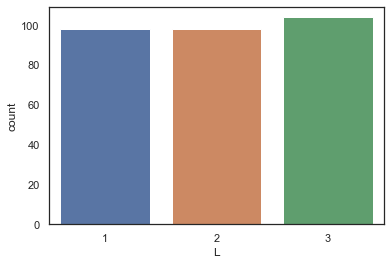

In [206]:


Y_test = test["L"]

# Drop 'label' column
X_test = test.drop(labels = ["L"],axis = 1) 

g = sns.countplot(Y_test)

Y_test.value_counts()

In [207]:
from sklearn.utils import shuffle

In [208]:
train,X_train, Y_train = shuffle(train, X_train, Y_train, random_state=0)

In [209]:
X_train

F1      F2      F3      F4      F5      F6      F7      F8      F9  \
993  0.3907  0.6294  0.5879  0.7718  0.8172  0.6377  1.6973  0.0452  0.1263   
859  0.3116  0.2006  0.6378  0.1844  0.8251  0.1021  1.7316 -0.0020 -0.0054   
298 -0.0482  0.6359  0.0180  0.8810  0.2713  0.7287 -0.0079  1.7429 -0.0730   
553  0.2398  0.5381  0.4280  0.7827  0.4594  0.9249  0.4543  0.7498  0.4837   
672  0.4894  0.2322  0.9444  0.1599  1.1365  0.1100  0.9970  0.0940  1.0839   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
835  0.4713  0.4386  0.7293  0.6936  0.7792  0.8545  0.6979  0.7343  0.8918   
192  0.0429  0.7170  0.2490  0.8308  0.4208  0.7661 -0.0232  1.7629  0.0186   
629  0.9711  0.1022  1.4946  0.2016  1.7635  0.1583  1.5542  0.1290  1.8343   
559  0.4445  0.4328  0.7354  0.6306  0.7351  0.8423  0.7142  0.6597  0.8077   
684  1.0203  0.1023  1.3399  0.3863  0.8918  0.4010  1.4000  0.3113  0.9264   

        F10     F11     F12  
993  1.8459 -0.0019  0.0013  
859  0.0055  0.0616 -0.0748  
298  2.0824  0.0142 -0.0183  
553  0.9178  0.3558  0.8688  
672  0.1925  0.9986  0.0970  
..      ...     ...     ...  
835  0.7419  0.6975  0.7380  
192  1.9788 -0.0687  0.0813  
629  0.1014  1.4889  0.2066  
559  0.7814  0.6867  0.6933  
684  0.3066  1.2568  0.4880  

[1000 rows x 12 columns]

In [210]:
Y_train

993    3
859    3
298    3
553    1
672    1
      ..
835    1
192    3
629    1
559    1
684    2
Name: L, Length: 1000, dtype: int64

In [211]:
#scatter plot

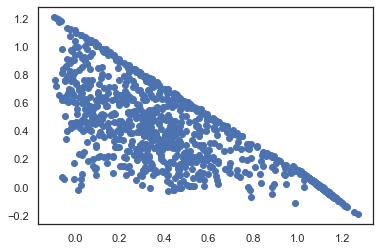

In [212]:
plt.scatter(train['F1'],train['F2'])
plt.show()

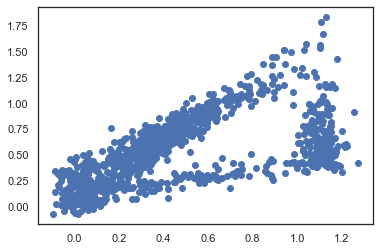

In [213]:
plt.scatter(train['F1'],train['F3'])
plt.show()

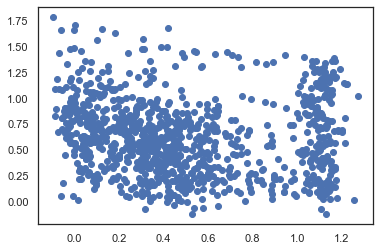

In [214]:
plt.scatter(train['F1'],train['F4'])
plt.show()

In [215]:

train.to_csv("Trainingset_1.csv",index=False)

# TASK 2: Principle component analysis

In [223]:
trainset = pd.read_csv("Trainingset_1.csv")
trainset



F1      F2      F3      F4      F5      F6      F7      F8      F9  \
0    0.3907  0.6294  0.5879  0.7718  0.8172  0.6377  1.6973  0.0452  0.1263   
1    0.3116  0.2006  0.6378  0.1844  0.8251  0.1021  1.7316 -0.0020 -0.0054   
2   -0.0482  0.6359  0.0180  0.8810  0.2713  0.7287 -0.0079  1.7429 -0.0730   
3    0.2398  0.5381  0.4280  0.7827  0.4594  0.9249  0.4543  0.7498  0.4837   
4    0.4894  0.2322  0.9444  0.1599  1.1365  0.1100  0.9970  0.0940  1.0839   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995  0.4713  0.4386  0.7293  0.6936  0.7792  0.8545  0.6979  0.7343  0.8918   
996  0.0429  0.7170  0.2490  0.8308  0.4208  0.7661 -0.0232  1.7629  0.0186   
997  0.9711  0.1022  1.4946  0.2016  1.7635  0.1583  1.5542  0.1290  1.8343   
998  0.4445  0.4328  0.7354  0.6306  0.7351  0.8423  0.7142  0.6597  0.8077   
999  1.0203  0.1023  1.3399  0.3863  0.8918  0.4010  1.4000  0.3113  0.9264   

        F10     F11     F12  L  
0    1.8459 -0.0019  0.0013  3  
1    0.0055  0.0616 -0.0748  3  
2    2.0824  0.0142 -0.0183  3  
3    0.9178  0.3558  0.8688  1  
4    0.1925  0.9986  0.0970  1  
..      ...     ...     ... ..  
995  0.7419  0.6975  0.7380  1  
996  1.9788 -0.0687  0.0813  3  
997  0.1014  1.4889  0.2066  1  
998  0.7814  0.6867  0.6933  1  
999  0.3066  1.2568  0.4880  2  

[1000 rows x 13 columns]

In [220]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression  


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


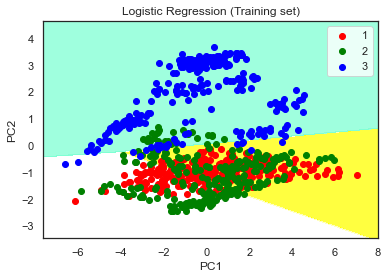

In [224]:
A = trainset.iloc[:, 0:13].values
B = trainset.iloc[:, 12].values
# Splitting the A and B into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
  
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.2, random_state = 0)
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)


pca = PCA(n_components = 2)
  
A_train = pca.fit_transform(A_train)
A_test = pca.transform(A_test)
  
explained_variance = pca.explained_variance_ratio_
classifier = LogisticRegression(random_state = 0)
classifier.fit(A_train, B_train)
# Predicting the test set result using 
# predict function under LogisticRegression 
B_pred = classifier.predict(A_test)
# Predicting the test set result using 
# predict function under LogisticRegression 
B_pred = classifier.predict(A_test)
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(B_test, B_pred)
# Predicting the training set
# result through scatter plot 
from matplotlib.colors import ListedColormap
  
X_set, y_set = A_train, B_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
  
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


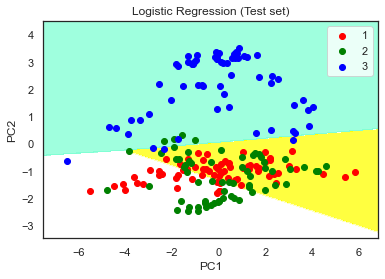

In [225]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = A_test, B_test
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()

In [230]:
#for scree plot

pca.explained_variance_ratio_

array([0.41402327, 0.2064377 ])

Text(0.5, 1.0, 'Scree Plot of variance explained ratio for each principal component')

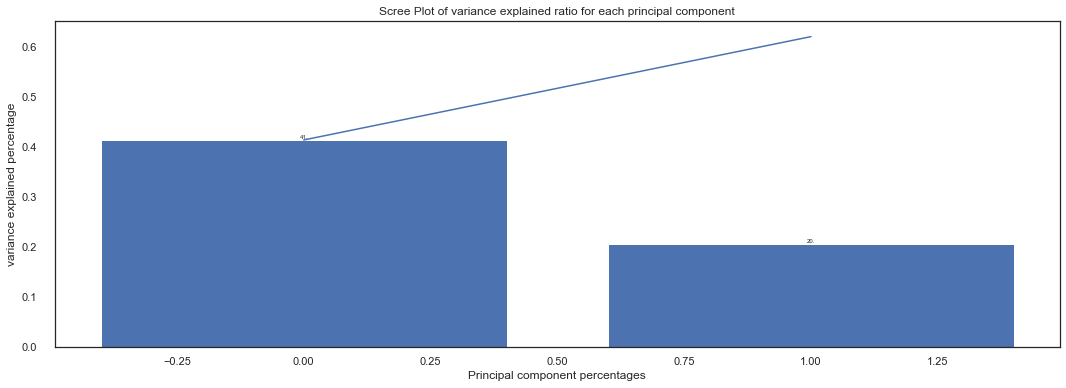

In [236]:
num_components=len(pca.explained_variance_ratio_)
index = np.arange(num_components)
values = pca.explained_variance_ratio_

#define the graph

plt.figure(figsize=(18,6))
ax= plt.subplot(111)
cumulative = np.cumsum(values)

ax.bar(index,values)
ax.plot(index,cumulative)

#add annotation to our graph 
for val in range (num_components):
    ax.annotate(r"%s" % ((str(values[val]*100)[:3])),(index[val],values[val]),
            va = 'bottom', ha= 'center', fontsize =6)

#setting tick parameters
ax.xaxis.set_tick_params(width=1)
ax.yaxis.set_tick_params(width =3,length =15)

#labeling x and y axis
ax.set_xlabel("Principal component percentages")
ax.set_ylabel("variance explained percentage")
plt.title("Scree Plot of variance explained ratio for each principal component")



# TASK 3: Divide whole set into a smaller training set II and a validation set


In [240]:
len(trainset)

1000

In [241]:
validation_set = trainset[:300]
trainingsetii = trainset[300:1000]
validation_set


F1      F2      F3      F4      F5      F6      F7      F8      F9  \
0    0.3907  0.6294  0.5879  0.7718  0.8172  0.6377  1.6973  0.0452  0.1263   
1    0.3116  0.2006  0.6378  0.1844  0.8251  0.1021  1.7316 -0.0020 -0.0054   
2   -0.0482  0.6359  0.0180  0.8810  0.2713  0.7287 -0.0079  1.7429 -0.0730   
3    0.2398  0.5381  0.4280  0.7827  0.4594  0.9249  0.4543  0.7498  0.4837   
4    0.4894  0.2322  0.9444  0.1599  1.1365  0.1100  0.9970  0.0940  1.0839   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
295  0.4475  0.6681  0.3219  0.5937  0.2144  0.5219  0.2775  0.6470  0.1795   
296  1.0284  0.0893  0.4097  0.9375  0.2813  0.6865  0.3827  0.9620  0.2830   
297  1.1509 -0.0533  0.8148  0.1712  0.6775  0.0884  0.8537  0.1243  0.6137   
298  0.5221  0.5633  0.9389  0.7340  0.9714  0.9561  0.9044  0.7730  1.1164   
299  1.1308 -0.0286  1.0005  0.7387  0.8390  0.1874  1.0848  0.6374  0.8534   

        F10     F11     F12  L  
0    1.8459 -0.0019  0.0013  3  
1    0.0055  0.0616 -0.0748  3  
2    2.0824  0.0142 -0.0183  3  
3    0.9178  0.3558  0.8688  1  
4    0.1925  0.9986  0.0970  1  
..      ...     ...     ... ..  
295  0.5440  0.2650  0.6645  2  
296  0.6586  0.3508  1.0086  2  
297  0.1453  0.7788  0.2154  2  
298  0.8080  0.9204  0.7541  1  
299  0.1373  1.0422  0.6836  2  

[300 rows x 13 columns]

In [238]:
validation_set.to_csv("Validationset.csv",index=False)

In [246]:
trainingsetii

F1      F2      F3      F4      F5      F6      F7      F8      F9  \
300  0.5268  0.3336  0.6997  0.4976  0.9724  0.3158  1.7171  0.0185  0.0106   
301  0.2918  0.2719  0.6459  0.2241  0.7378  0.2574  1.6834  0.0625  0.0286   
302  0.7230  0.2897  1.0617  0.5399  1.2918  0.5118  1.1537  0.4307  1.2086   
303 -0.0178  0.9781  0.2480  1.0045  0.2617  1.1303 -0.0576  1.8007  0.0309   
304  0.3390  0.3020  0.5153  0.4942  0.5936  0.5545  0.5314  0.4704  0.6225   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995  0.4713  0.4386  0.7293  0.6936  0.7792  0.8545  0.6979  0.7343  0.8918   
996  0.0429  0.7170  0.2490  0.8308  0.4208  0.7661 -0.0232  1.7629  0.0186   
997  0.9711  0.1022  1.4946  0.2016  1.7635  0.1583  1.5542  0.1290  1.8343   
998  0.4445  0.4328  0.7354  0.6306  0.7351  0.8423  0.7142  0.6597  0.8077   
999  1.0203  0.1023  1.3399  0.3863  0.8918  0.4010  1.4000  0.3113  0.9264   

        F10     F11     F12  L  
300  1.9838 -0.0213  0.0246  3  
301  1.9644 -0.0056  0.0065  3  
302  0.6427  0.9571  0.6620  1  
303  1.9653 -0.0677  0.0799  3  
304  0.5370  0.5093  0.4972  1  
..      ...     ...     ... ..  
995  0.7419  0.6975  0.7380  1  
996  1.9788 -0.0687  0.0813  3  
997  0.1014  1.4889  0.2066  1  
998  0.7814  0.6867  0.6933  1  
999  0.3066  1.2568  0.4880  2  

[700 rows x 13 columns]

In [247]:

trainingsetii.to_csv("TrainingSetII.csv",index=False)

# Task 4: INVESTIGATE

C:\Users\seaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LinearRegression()

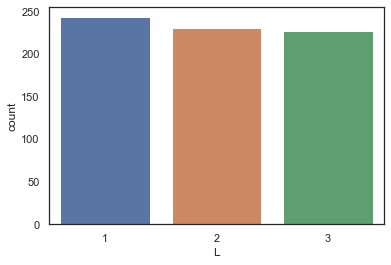

In [252]:
from sklearn.linear_model import LinearRegression



Y_train = trainingsetii["L"]

# Drop 'label' column
X_train = trainingsetii.drop(labels = ["L"],axis = 1)  

g = sns.countplot(Y_train)

Y_train.value_counts()


# instantiate the regressor class
regressor = LinearRegression()
# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, Y_train)

# Result of the Model


C:\Users\seaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The Explained Variance: 0.86


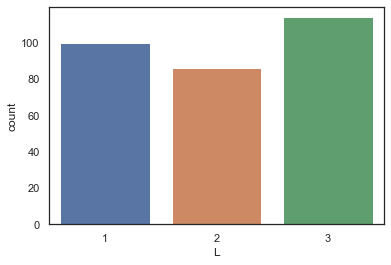

In [254]:

Y_test = validation_set["L"]

# Drop 'label' column
X_test = validation_set.drop(labels = ["L"],axis = 1)  

g = sns.countplot(Y_test)

Y_train.value_counts()
# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
print("The Explained Variance: %.2f" % regressor.score(X_test, Y_test))


No handles with labels found to put in legend.


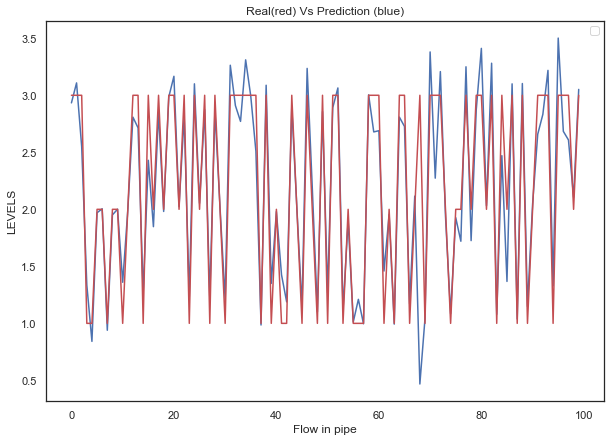

In [257]:
#y_test
#prediction.shape[0]
plt.figure(figsize=(10, 7))
plt.plot(prediction[:100], 'b-') #selecting only 100 values
plt.plot(Y_test[:100], 'r-')     #selecting only 100 values
plt.legend(); plt.xlabel('Flow in pipe'); plt.ylabel('LEVELS')
plt.title('Real(red) Vs Prediction (blue)');